Importing data 

In [4]:
import pandas as pd

# Specify the file path of the dataset
file_path = r"C:\Giang\Studying\Coding fun\coffee dataset- 2023\Coffee Quality Data\df_arabica_clean.csv"

# Read the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded correctly
print(df.head())


   Unnamed: 0  ID Country of Origin                 Farm Name  \
0           0   0          Colombia          Finca El Paraiso   
1           1   1            Taiwan  Royal Bean Geisha Estate   
2           2   2              Laos        OKLAO coffee farms   
3           3   3        Costa Rica                 La Cumbre   
4           4   4          Colombia           Finca Santuario   

                                Lot Number                           Mill  \
0                               CQU2022015               Finca El Paraiso   
1  The 2022 Pacific Rim Coffee Summit,T037       Royal Bean Geisha Estate   
2  The 2022 Pacific Rim Coffee Summit,LA01  oklao coffee processing plant   
3                               CQU2022017        La Montana Tarrazu MIll   
4                               CQU2023002                Finca Santuario   

  ICO Number                   Company   Altitude                Region  ...  \
0        NaN      Coffee Quality Union  1700-1930        Piendamo,

The main coffee aspects score

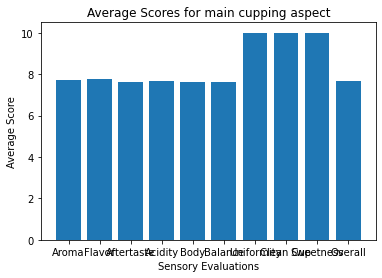

In [9]:
import matplotlib.pyplot as plt

# Calculate the average scores for aroma, flavor, and body
average_scores = df[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness','Overall'
]].mean()

# Create a bar plot
plt.bar(average_scores.index, average_scores.values)
plt.xlabel('Sensory Evaluations')
plt.ylabel('Average Score')
plt.title('Average Scores for main cupping aspect')

# Set the y-axis limits to make the differences more visible


plt.show()



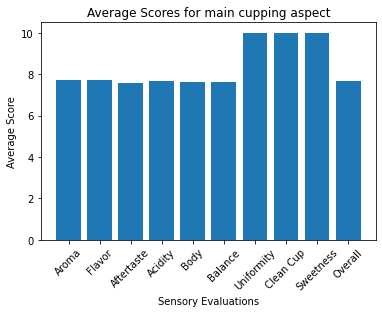

In [10]:
average_scores = df[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness','Overall'
]].mean()

# Create a bar plot
plt.bar(average_scores.index, average_scores.values)
plt.xlabel('Sensory Evaluations')
plt.ylabel('Average Score')
plt.title('Average Scores for main cupping aspect')

# Set the y-axis limits to make the differences more visible
plt.xticks(rotation=45)

plt.show()

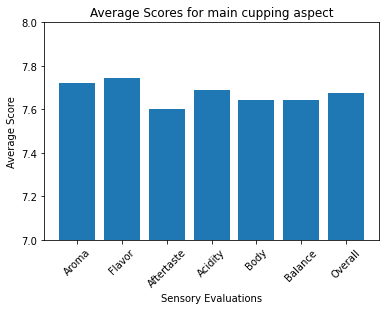

In [11]:
#immune some variables since their average is 10 
average_scores = df[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance','Overall'
]].mean()

# Create a bar plot
plt.bar(average_scores.index, average_scores.values)
plt.xlabel('Sensory Evaluations')
plt.ylabel('Average Score')
plt.title('Average Scores for main cupping aspect')

# Set the y-axis limits to make the differences more visible
plt.xticks(rotation=45)
plt.ylim(7,8)
plt.show()

The relationship between main categories and Total Cup Points

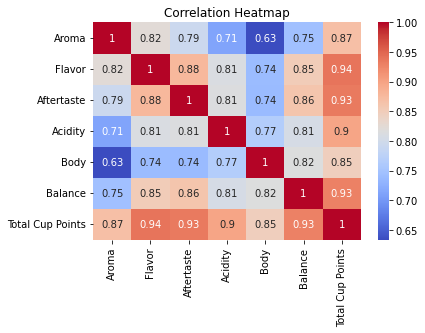

In [13]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body','Balance', 'Total Cup Points']].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Country of origin exploration

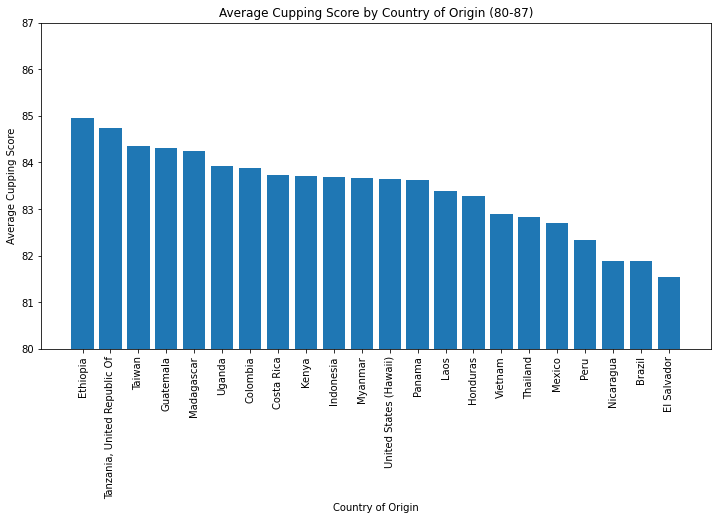

The country of origin with the highest cupping score is Ethiopia with an average score of 84.96090909090908.
Country of Origin
Ethiopia                        84.960909
Tanzania, United Republic Of    84.735000
Taiwan                          84.350328
Guatemala                       84.301429
Madagascar                      84.250000
Uganda                          83.916667
Colombia                        83.877368
Costa Rica                      83.740000
Kenya                           83.710000
Indonesia                       83.693333
Myanmar                         83.670000
United States (Hawaii)          83.650000
Panama                          83.625000
Laos                            83.390000
Honduras                        83.282308
Vietnam                         82.892500
Thailand                        82.827500
Mexico                          82.710000
Peru                            82.332500
Nicaragua                       81.892857
Brazil                          8

In [45]:
import matplotlib.pyplot as plt

# Group the data by "Country of Origin" and calculate the average cupping score
average_scores_by_country = df.groupby('Country of Origin')['Total Cup Points'].mean()

# Sort the countries by average cupping score in descending order
average_scores_by_country = average_scores_by_country.sort_values(ascending=False)

# Filter out countries with average cupping scores outside the range of 80 to 87
filtered_scores_by_country = average_scores_by_country[(average_scores_by_country >= 80) & (average_scores_by_country <= 87)]

# Calculate the country with the highest cupping score
country_highest_score = filtered_scores_by_country.idxmax()
highest_score = filtered_scores_by_country.max()

# Create a bar plot of average cupping scores by country
plt.figure(figsize=(12, 6))
plt.bar(filtered_scores_by_country.index, filtered_scores_by_country.values)
plt.xlabel('Country of Origin')
plt.ylabel('Average Cupping Score')
plt.title('Average Cupping Score by Country of Origin (80-87)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.ylim(80, 87)
plt.show()

print(f"The country of origin with the highest cupping score is {country_highest_score} with an average score of {highest_score}.")
print(filtered_scores_by_country)


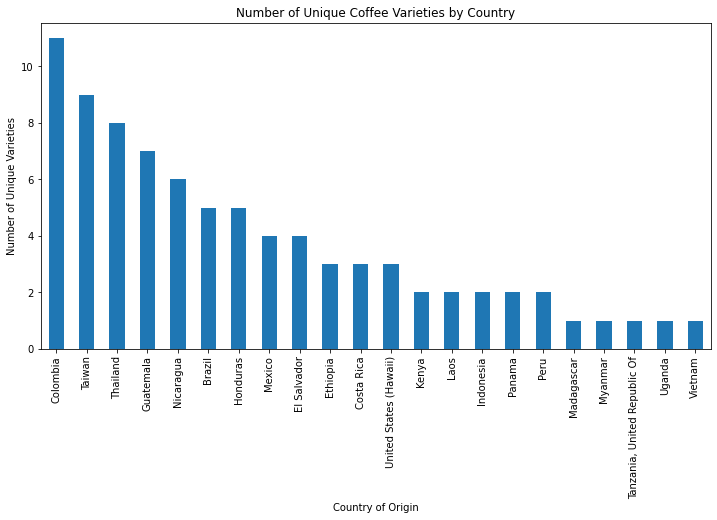

Countries with the highest number of unique coffee varieties:
Country of Origin
Colombia     11
Taiwan        9
Thailand      8
Guatemala     7
Nicaragua     6
Name: Variety, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Group the data by "Country of Origin" and count the unique values in "Variety" column
variety_counts_by_country = df.groupby('Country of Origin')['Variety'].nunique()

# Sort the countries by the number of unique varieties in descending order
variety_counts_by_country = variety_counts_by_country.sort_values(ascending=False)

# Plot the number of unique varieties by country
plt.figure(figsize=(12, 6))
variety_counts_by_country.plot(kind='bar')
plt.xlabel('Country of Origin')
plt.ylabel('Number of Unique Varieties')
plt.title('Number of Unique Coffee Varieties by Country')

plt.show()

print("Countries with the highest number of unique coffee varieties:")
print(variety_counts_by_country.head(5))  # Display the top 5 countries



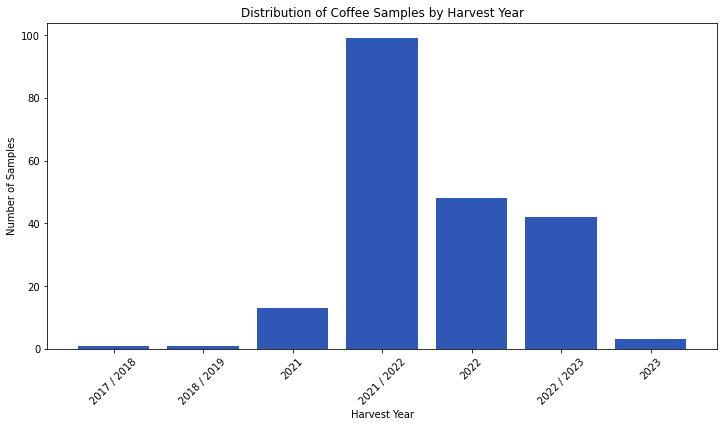

In [15]:
import matplotlib.pyplot as plt

# Count the number of samples for each harvest year
harvest_year_counts = df['Harvest Year'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(harvest_year_counts.index, harvest_year_counts.values, color='#2E57B6')
plt.xlabel('Harvest Year')
plt.ylabel('Number of Samples')
plt.title('Distribution of Coffee Samples by Harvest Year')
plt.xticks(rotation=45)
plt.show()


Varieties Exploration

In [18]:
import pandas as pd

# Group the data by "Country of Origin" and "Variety", and count the unique values in "Variety" column
variety_counts_by_country = df.groupby(['Country of Origin', 'Variety']).size().reset_index(name='Count')

# Find the countries with the highest number of unique varieties
top_countries = variety_counts_by_country.groupby('Country of Origin')['Count'].count().nlargest(5).index

# Filter the data for the top countries
top_varieties = variety_counts_by_country[variety_counts_by_country['Country of Origin'].isin(top_countries)]

# Group the top varieties by country and aggregate the variety names
top_varieties_agg = top_varieties.groupby('Country of Origin')['Variety'].agg(lambda x: ', '.join(x))

# Create a DataFrame for the top countries and varieties
result_df = pd.DataFrame({'Country of Origin': top_countries, 'Varieties': top_varieties_agg}).reset_index(drop=True)

# Display the result as a table
print(result_df)


  Country of Origin                                          Varieties
0          Colombia  Bourbon Sidra, Castillo, Castillo Paraguaycito...
1            Taiwan  BOURBON, CATURRA Y CATIMOR, Bourbon, Catuai, C...
2          Thailand  Catrenic, Caturra, Caturra-Catuai, Parainema, ...
3         Guatemala  Caturra, Gesha, SL34, Sl34+Gesha, Typica, Typi...
4         Nicaragua  Bourbon, Bourbon, Catimor, Caturra, Typica, Ca...


In [22]:
# Group the data by "Country of Origin" and "Variety", and count the unique values in "Variety" column
variety_counts_by_country = df.groupby(['Country of Origin', 'Variety']).size().reset_index(name='Count')

# Find the countries with the highest number of unique varieties
top_countries = variety_counts_by_country.groupby('Country of Origin')['Count'].count().nlargest(5).index

# Filter the data for the top countries
top_varieties = variety_counts_by_country[variety_counts_by_country['Country of Origin'].isin(top_countries)]

# Group the top varieties by country and aggregate the variety names
top_varieties_agg = top_varieties.groupby('Country of Origin')['Variety'].agg(lambda x: ', '.join(x))
# Calculate the number of varieties for each country
num_varieties = top_varieties.groupby('Country of Origin')['Count'].count()

# Create a DataFrame for the top countries, number of varieties, and varieties
result_df = pd.DataFrame({'Country of Origin': top_countries,
                          'Number of Varieties': num_varieties,
                          'Varieties': top_varieties_agg}).reset_index(drop=True)

# Display the result as a table with full variety names
pd.set_option('display.max_colwidth', None)
print(result_df)


  Country of Origin  Number of Varieties  \
0          Colombia                   11   
1            Taiwan                    7   
2          Thailand                    6   
3         Guatemala                    9   
4         Nicaragua                    8   

                                                                                                                                                                                              Varieties  
0  Bourbon Sidra, Castillo, Castillo Paraguaycito, Castillo and Colombia blend, Castillo,Caturra,Bourbon, Caturra, Caturra,Colombia,Castillo, Red Bourbon, Red Bourbon,Caturra, Santander, Typica Gesha  
1                                                                     BOURBON, CATURRA Y CATIMOR, Bourbon, Catuai, Caturra, Gesha, MARSELLESA, CATUAI, CATURRA & MARSELLESA, ANACAFE 14, CATUAI, Typica  
2                                                                                                                                

In [26]:
import pandas as pd

# Group the data by "Country of Origin" and "Variety", and count the unique values in "Variety" column
variety_counts_by_country = df.groupby(['Country of Origin', 'Variety']).size().reset_index(name='Count')

# Find the countries with the highest number of unique varieties
top_countries = variety_counts_by_country.groupby('Country of Origin')['Variety'].nunique().nlargest(5).index

# Filter the data for the top countries
top_varieties = variety_counts_by_country[variety_counts_by_country['Country of Origin'].isin(top_countries)]

# Calculate the number of varieties for each country
num_varieties = top_varieties.groupby('Country of Origin')['Variety'].nunique().reset_index(name='Number of Varieties')

# Aggregate the unique varieties for each country
top_varieties_agg = top_varieties.groupby('Country of Origin')['Variety'].unique().reset_index(name='Varieties')
top_varieties_agg['Varieties'] = top_varieties_agg['Varieties'].apply(lambda x: ', '.join(x))

# Merge the number of varieties and aggregated varieties into a single DataFrame
result_df = pd.merge(num_varieties, top_varieties_agg, on='Country of Origin')

# Display the result as a table with full variety names
pd.set_option('display.max_colwidth', None)
print(result_df)


  Country of Origin  Number of Varieties  \
0          Colombia                   11   
1         Guatemala                    7   
2         Nicaragua                    6   
3            Taiwan                    9   
4          Thailand                    8   

                                                                                                                                                                                              Varieties  
0  Bourbon Sidra, Castillo, Castillo Paraguaycito, Castillo and Colombia blend, Castillo,Caturra,Bourbon, Caturra, Caturra,Colombia,Castillo, Red Bourbon, Red Bourbon,Caturra, Santander, Typica Gesha  
1                                                                     BOURBON, CATURRA Y CATIMOR, Bourbon, Catuai, Caturra, Gesha, MARSELLESA, CATUAI, CATURRA & MARSELLESA, ANACAFE 14, CATUAI, Typica  
2                                                                                                                                

In [ ]:
# Group the data by "Variety" and find the maximum cupping score for each variety
top_cupping_scores = df.groupby('Variety')['Total Cup Points'].max().reset_index()
top_cupping_scores = top_cupping_scores.sort_values('Total Cup Points', ascending=False).reset_index(drop=True)

# Group the data by "Variety" and find the maximum flavor score for each variety
top_flavor_scores = df.groupby('Variety')['Flavor'].max().reset_index()
top_flavor_scores = top_flavor_scores.sort_values('Flavor', ascending=False).reset_index(drop=True)

# Group the data by "Variety" and find the maximum balance score for each variety
top_balance_scores = df.groupby('Variety')['Balance'].max().reset_index()
top_balance_scores = top_balance_scores.sort_values('Balance', ascending=False).reset_index(drop=True)

# Group the data by "Variety" and find the maximum body score for each variety
top_body_scores = df.groupby('Variety')['Body'].max().reset_index()
top_body_scores = top_body_scores.sort_values('Body', ascending=False).reset_index(drop=True)

# Print the top scores for each category
print("Top Cupping Scores by Variety:")
print(top_cupping_scores.head(5))
print()

print("Top Flavor Scores by Variety:")
print(top_flavor_scores.head(5))
print()

print("Top Balance Scores by Variety:")
print(top_balance_scores.head(5))
print()

print("Top Body Scores by Variety:")
print(top_body_scores.head(5))


Top Cupping Scores by Variety:
       Variety  Total Cup Points
0     Castillo             89.33
1        Gesha             87.58
2         Java             87.42
3  Red Bourbon             87.08
4   Sl34+Gesha             86.75

Top Flavor Scores by Variety:
               Variety  Flavor
0                Gesha    8.50
1             Castillo    8.50
2                 Java    8.42
3          Red Bourbon    8.33
4  Ethiopian Heirlooms    8.25

Top Balance Scores by Variety:
      Variety  Balance
0    Castillo     8.42
1       Gesha     8.25
2         SHG     8.17
3        Java     8.17
4  Sl34+Gesha     8.08

Top Body Scores by Variety:
    Variety  Body
0  Castillo  8.25
1     Gesha  8.25
2   Bourbon  8.17
3   Caturra  8.08
4   Catimor  8.08


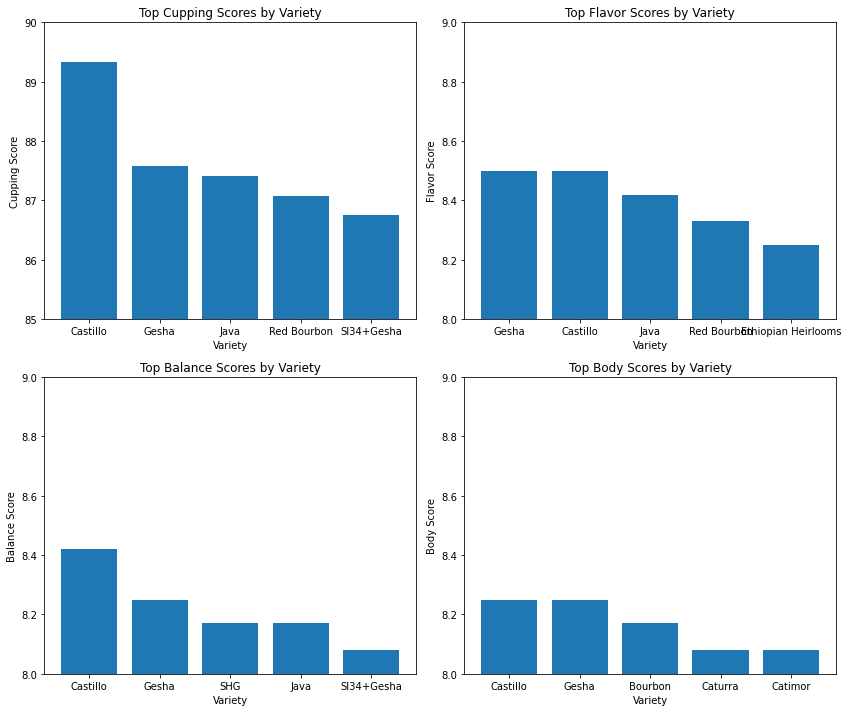

In [ ]:
import matplotlib.pyplot as plt

# Group the data by "Variety" and find the maximum scores for each category
top_cupping_scores = df.groupby('Variety')['Total Cup Points'].max().sort_values(ascending=False).head(5)
top_flavor_scores = df.groupby('Variety')['Flavor'].max().sort_values(ascending=False).head(5)
top_balance_scores = df.groupby('Variety')['Balance'].max().sort_values(ascending=False).head(5)
top_body_scores = df.groupby('Variety')['Body'].max().sort_values(ascending=False).head(5)

# Create subplots for each category
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Top Cupping Scores
axes[0, 0].bar(top_cupping_scores.index, top_cupping_scores.values)
axes[0, 0].set_title('Top Cupping Scores by Variety')
axes[0, 0].set_xlabel('Variety')
axes[0, 0].set_ylabel('Cupping Score')
axes[0, 0].set_ylim(85, 90)

# Top Flavor Scores
axes[0, 1].bar(top_flavor_scores.index, top_flavor_scores.values)
axes[0, 1].set_title('Top Flavor Scores by Variety')
axes[0, 1].set_xlabel('Variety')
axes[0, 1].set_ylabel('Flavor Score')
axes[0, 1].set_ylim(8, 9)

# Top Balance Scores
axes[1, 0].bar(top_balance_scores.index, top_balance_scores.values)
axes[1, 0].set_title('Top Balance Scores by Variety')
axes[1, 0].set_xlabel('Variety')
axes[1, 0].set_ylabel('Balance Score')
axes[1, 0].set_ylim(8, 9)

# Top Body Scores
axes[1, 1].bar(top_body_scores.index, top_body_scores.values)
axes[1, 1].set_title('Top Body Scores by Variety')
axes[1, 1].set_xlabel('Variety')
axes[1, 1].set_ylabel('Body Score')
axes[1, 1].set_ylim(8, 9)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# Group the data by "Variety" and find the maximum scores for each category
top_cupping_scores = df.groupby('Variety')['Total Cup Points'].max().sort_values(ascending=False).head(5)
top_flavor_scores = df.groupby('Variety')['Flavor'].max().sort_values(ascending=False).head(5)
top_balance_scores = df.groupby('Variety')['Balance'].max().sort_values(ascending=False).head(5)
top_body_scores = df.groupby('Variety')['Body'].max().sort_values(ascending=False).head(5)

# Create bar plots using plotly.express
cupping_fig = px.bar(top_cupping_scores, x=top_cupping_scores.index, y=top_cupping_scores.values,
                     labels={'x': 'Variety', 'y': 'Cupping Score'},
                     title='Top Cupping Scores by Variety', range_y=[85, 90])

flavor_fig = px.bar(top_flavor_scores, x=top_flavor_scores.index, y=top_flavor_scores.values,
                    labels={'x': 'Variety', 'y': 'Flavor Score'},
                    title='Top Flavor Scores by Variety', range_y=[8, 9])

balance_fig = px.bar(top_balance_scores, x=top_balance_scores.index, y=top_balance_scores.values,
                     labels={'x': 'Variety', 'y': 'Balance Score'},
                     title='Top Balance Scores by Variety', range_y=[8, 9])

body_fig = px.bar(top_body_scores, x=top_body_scores.index, y=top_body_scores.values,
                  labels={'x': 'Variety', 'y': 'Body Score'},
                  title='Top Body Scores by Variety', range_y=[8, 9])


# Display the charts
cupping_fig.show()
flavor_fig.show()
balance_fig.show()
body_fig.show()


Variety and Country of Origin 

In [ ]:
varieties = ['Castillo', 'Gesha', 'SL34', 'Java', 'Red Bourbon', 'Sl34+Gesha']

# Filter the dataset for the specified varieties
filtered_data = df[df['Variety'].isin(varieties)]

# Get the unique countries for each variety
countries = filtered_data.groupby('Variety')['Country of Origin'].unique()

# Display the countries for each variety
for variety in varieties:
    print(f"Variety: {variety}")
    print(f"Countries: {', '.join(countries[variety])}\n")


Variety: Castillo
Countries: Colombia

Variety: Gesha
Countries: Taiwan, Costa Rica, Guatemala, Ethiopia, Peru

Variety: SL34
Countries: Taiwan

Variety: Java
Countries: Laos, Thailand

Variety: Red Bourbon
Countries: Colombia

Variety: Sl34+Gesha
Countries: Taiwan



In [ ]:
varieties = ['Castillo', 'Gesha', 'SL34', 'Java', 'Red Bourbon', 'Sl34+Gesha']

# Filter the dataset for the specified varieties
filtered_data = df[df['Variety'].isin(varieties)]

# Get the unique companies and producers for each variety
companies = filtered_data.groupby('Variety')['Company'].unique()
producers = filtered_data.groupby('Variety')['Producer'].unique()

# Display the companies and producers for each variety
for variety in varieties:
    print(f"Variety: {variety}")
    print("Companies:")
    for company in companies[variety]:
        print(company)
    print("Producers:")
    for producer in producers[variety]:
        print(producer)
        
    print()


Variety: Castillo
Companies:
Coffee Quality Union
Producers:
Diego Samuel Bermudez

Variety: Gesha
Companies:
Taiwan Coffee Laboratory
Coffee Quality Union
Kerchanshe Trading PLC
Dongbi coffee
宸嶧國際有限公司
Taiwu Coffee Cooperative
Producers:
曾福森
Santa Maria de Dota
Emilio Antonio Medina Garcia
黃保錫
Karen Acajabon
賴彥合
Kerchanshe
陳景立
王瀅惠
Fredy Orantes
方政倫
郭志豪
陳清龍
葉明讚 (YE,MING-ZAN)
許定燁
陳建源(CHEN, JIAN-YUAN)
陳榮豐
黃簡秋蘭
王清連
Ruya Yayu
郭雅聰（KUO,YA-TSUNG）
浦瀚文
李泓錡
Various producers
郭亮志

Variety: SL34
Companies:
Taiwan Coffee Laboratory
Yongshun
Producers:
鍾旭亮
葉世遠
蘇甘永
鄭虞坪
吳振宏
王政淵
陳善東

Variety: Java
Companies:
Taiwan Coffee Laboratory
Coffee Quality Union
Doi Tung Development Project
Producers:
WU TAO CHI
Chalerm
Doi Tung Development Project

Variety: Red Bourbon
Companies:
Coffee Quality Union
Producers:
Camilo Merizalde

Variety: Sl34+Gesha
Companies:
Taiwan Coffee Laboratory
Producers:
莊家榮



Processing Method Exploration

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

average_scores = df.groupby('Processing Method')['Total Cup Points'].mean().reset_index()
average_scores = average_scores.sort_values('Total Cup Points', ascending=False)

# Set color for top 3 bars
colors = ['pink' if i < 3 else 'blue' for i in range(len(average_scores))]

fig = go.Figure(data=[go.Bar(x=average_scores['Processing Method'],
                             y=average_scores['Total Cup Points'],
                             marker_color=colors)])

fig.update_layout(title='Average Cupping Score by Processing Method',
                  xaxis_title='Processing Method',
                  yaxis_title='Total Cup Points')
fig.update_yaxes(range=[75, 90])
fig.show()



In [ ]:

# Group the data by processing method and calculate the average body score and flavor score
processing_scores = df.groupby('Processing Method').agg({'Body': 'mean', 'Flavor': 'mean', 'Aftertaste': 'mean'}).reset_index()

# Create a bar chart
ar_fig = px.bar(processing_scores, x='Processing Method', y=['Body', 'Flavor', 'Aftertaste'],
                 title='Comparison of Processing Method with Body Score and Flavor Score')
# Customize the plot layout
bar_fig.update_layout(
    xaxis=dict(title='Processing Method'),
    yaxis=dict(title='Score'),
    legend_title='Score Type'
)

# Show the bar chart
bar_fig.show()
